In [21]:
import matplotlib.pyplot as plt

import re
import numpy as np
import os

def get_avg_tgs_from_log(log_path, num_values=3):
    """
    Parses the last `num_values` TGS values from a log file and returns their average.

    Parameters:
        log_path (str): Path to the log file.
        num_values (int): Number of most recent TGS values to average.

    Returns:
        float or None: Average of the last `num_values` TGS values, or None if not found.
    """
    try:
        with open(log_path, "r") as f:
            log_data = f.read()
        tgs_values = re.findall(r"TGS:\s*([\d.]+)", log_data)
        if len(tgs_values) < num_values:
            print(f"Only found {len(tgs_values)} TGS values.")
        last_values = list(map(float, tgs_values[-num_values:]))
        return sum(last_values) / len(last_values) if last_values else None
    except FileNotFoundError:
        print(f"File not found: {log_path}")
        return None

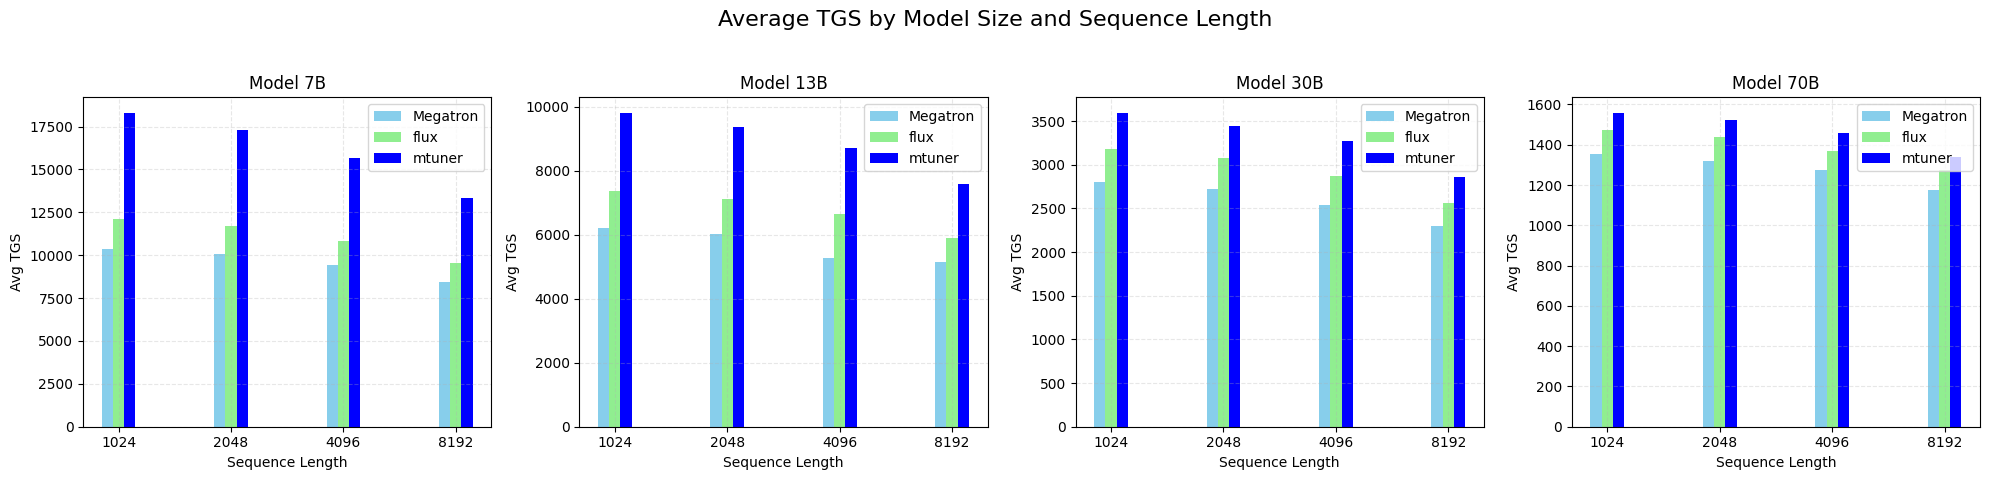

In [ ]:
modelsizes = [7, 13, 30, 70]
seqlens = [1024, 2048, 4096, 8192]

# Plot
fig, axs = plt.subplots(1, len(modelsizes), figsize=(20, 5))
fig.suptitle("Average TGS by Model Size and Sequence Length", fontsize=16)

bar_width = 0.3
x = np.arange(len(seqlens))  # the label locations

for idx, model in enumerate(modelsizes):
    megatron_tgs_list = []
    flux_tgs_list = []
    mtuner_tgs_list = []

    for seqlen in seqlens:
        megatron_path = f"megatron_output/result_modelsize{model}_seq{seqlen}.txt"
        flux_path = f"flux_output/result_modelsize{model}_seq{seqlen}.txt"
        mtuner_path = f"mtuner_output/result_modelsize{model}_seq{seqlen}.txt"

        megatron_tgs = get_avg_tgs_from_log(megatron_path)
        flux_tgs = get_avg_tgs_from_log(flux_path)
        mtuner_tgs = get_avg_tgs_from_log(mtuner_path)

        megatron_tgs_list.append(megatron_tgs or 0)
        flux_tgs_list.append(flux_tgs or 0)
        mtuner_tgs_list.append(mtuner_tgs or 0)

    ax = axs[idx]
    ax.bar(x - bar_width/3, megatron_tgs_list, bar_width/3, label='Megatron', color='skyblue')
    ax.bar(x, flux_tgs_list, bar_width/3, label='flux', color='lightgreen')
    ax.bar(x + bar_width/3, mtuner_tgs_list, bar_width/3, label='mtuner', color='blue')

    ax.set_title(f"Model {model}B")
    ax.set_xticks(x)
    ax.set_xticklabels([str(s) for s in seqlens])
    ax.set_xlabel("Sequence Length")
    ax.set_ylabel("Avg TGS")
    ax.set_ylim(bottom=0)
    ax.tick_params(left=True, labelleft=True)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()